In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stateinterpreter.classifier import MD_Data, CV_path
#%matplotlib widget

(-3.141592653589793, 3.141592653589793)

In [2]:
dataframe = pd.read_csv('data/chignolin-v3/cv_234.csv')

In [9]:
model =  MD_Data(dataframe)
sample = model.sample(1000, regex_filter = 'cos_|sin_|HB_CONTACT')

In [27]:
if False:
    basins = np.split(sample.configurations, 7)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for basin in basins:
        x, y, z = basin[:,0], basin[:,1], basin[:,2]
        ax.scatter(x,y,z, s=1.1)
        #x, y = basin[:,0], basin[:,1]
        #ax.scatter(x,y, s=1.1)
        
    ax.set_xlabel(sample.features[0])
    ax.set_ylabel(sample.features[1])
    ax.set_zlabel(sample.features[2])
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
C_range = np.geomspace(2, 100, 25)
kwargs = {'LASSO':True, 'max_iter':1000}
dset = sample.train_test_dataset()
n_examples = dset[0].shape[0]
C_range_in = C_range/n_examples
cvpath = CV_path(dset, sample.features, quadratic_kernel=False)

In [11]:
cvpath.compute(C_range_in, **kwargs);

/home/novelli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/novelli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/novelli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/novelli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/novelli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

In [14]:
C = np.exp(3.5)
cvpath.print_relevant_features(C)

State 0:
	 40.1% | HB_CONTACT TYR1-O -- TYR10-N
	 31.4% | SIDECHAIN cos_chi1 ASP3
	 23.7% | HB_CONTACT ASP3-O -- GLY7-N
	 4.9%  | HB_CONTACT ASP3-N -- THR8-O
State 1:
	 42.0% | SIDECHAIN cos_chi1 THR8
	 30.4% | SIDECHAIN sin_chi1 THR6
	 27.6% | SIDECHAIN sin_chi2 TYR2
State 2:
	 40.3% | SIDECHAIN cos_chi1 THR8
	 32.7% | SIDECHAIN sin_chi1 THR6
	 27.0% | SIDECHAIN sin_chi2 TYR2
	 0.0%  | HB_CONTACT THR8-OG1s -- TRP9-N
State 3:
	 89.3% | SIDECHAIN sin_chi2 TYR2
	 8.6%  | SIDECHAIN cos_chi2 TYR2
	 2.1%  | HB_CONTACT THR6-OG1s -- THR8-OG1s
State 4:
	 94.4% | SIDECHAIN sin_chi2 TYR2
	 2.9%  | SIDECHAIN cos_chi2 TYR2
	 2.7%  | HB_CONTACT THR6-OG1s -- THR8-OG1s
State 5:
	 78.2% | HB_CONTACT THR6-OG1s -- THR8-OG1s
	 18.4% | SIDECHAIN sin_chi2 TYR2
	 2.0%  | SIDECHAIN cos_chi2 TYR2
	 1.4%  | HB_CONTACT THR6-OG1s -- THR8-N
State 6:
	 78.4% | HB_CONTACT THR6-OG1s -- THR8-OG1s
	 17.8% | SIDECHAIN sin_chi2 TYR2
	 3.0%  | SIDECHAIN cos_chi2 TYR2
	 0.8%  | HB_CONTACT THR6-OG1s -- THR8-N


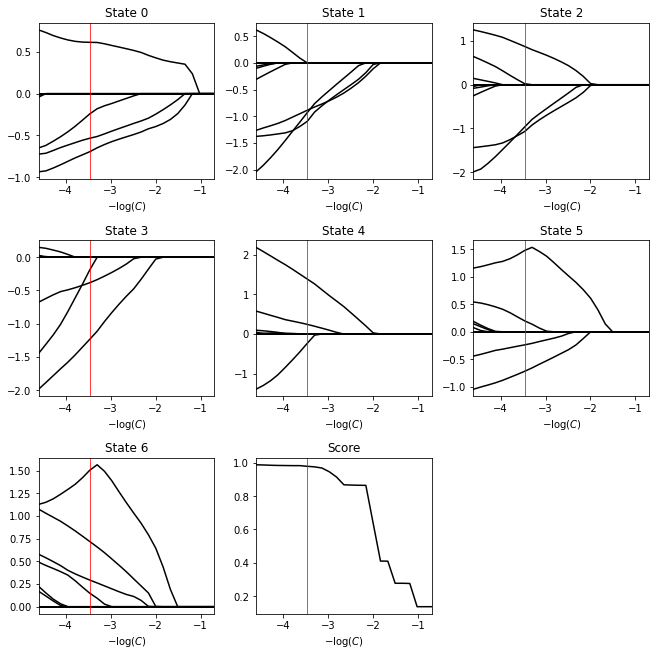

In [15]:
cvpath.plot(C);

(<Figure size 648x648 with 7 Axes>,
 [<AxesSubplot:xlabel='SIDECHAIN cos_chi1 ASP3', ylabel='SIDECHAIN cos_chi1 TYR2'>,
  <AxesSubplot:xlabel='SIDECHAIN cos_chi1 THR8', ylabel='SIDECHAIN sin_chi2 TYR2'>,
  <AxesSubplot:xlabel='SIDECHAIN cos_chi1 THR8', ylabel='SIDECHAIN sin_chi2 TYR2'>,
  <AxesSubplot:xlabel='SIDECHAIN sin_chi2 TYR2', ylabel='SIDECHAIN cos_chi2 TYR2'>,
  <AxesSubplot:xlabel='SIDECHAIN sin_chi2 TYR2', ylabel='SIDECHAIN cos_chi2 TYR2'>,
  <AxesSubplot:xlabel='SIDECHAIN sin_chi1 THR6', ylabel='SIDECHAIN sin_chi2 TYR2'>,
  <AxesSubplot:xlabel='SIDECHAIN sin_chi1 THR6', ylabel='SIDECHAIN sin_chi2 TYR2'>])

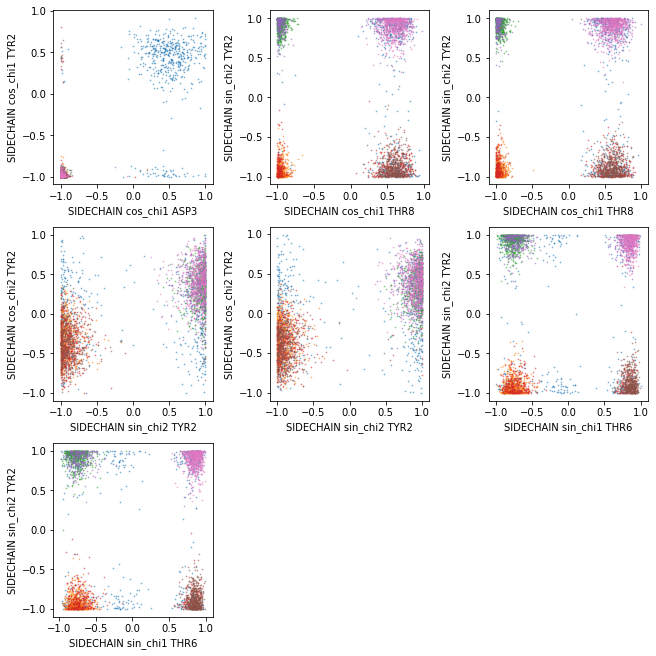

In [10]:
cvpath.plot_relevant_features(C, model, n_configs=500)

In [11]:
prunedcv = cvpath.get_pruned_CVpath(C)

In [12]:
prunedcv.compute(C_range_in, **kwargs);

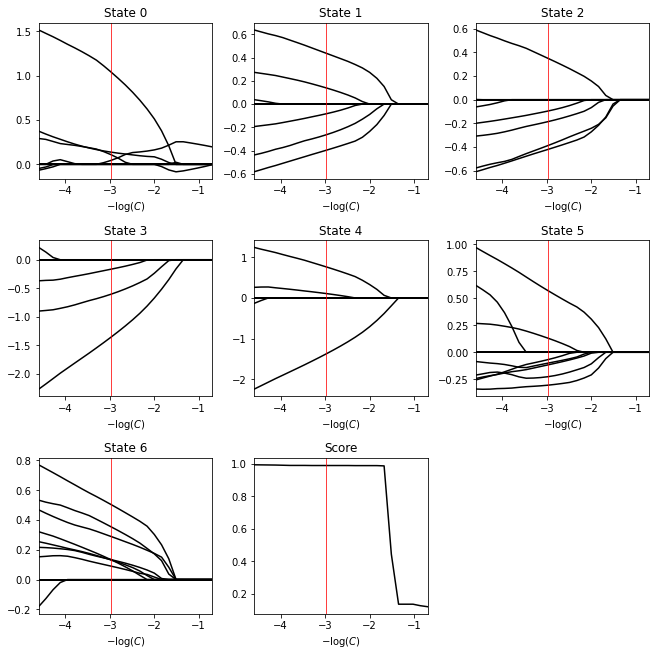

In [13]:
prunedcv.plot(C);

In [15]:
prunedcv.print_relevant_features(C)

State 0:
	 97.1% | SIDECHAIN cos_chi1 ASP3
	 1.7%  | BACKBONE cos_psi PRO4 || BACKBONE cos_psi PRO4
	 1.1%  | SIDECHAIN cos_chi1 TYR2 || SIDECHAIN cos_chi1 TYR2
	 0.2%  | SIDECHAIN cos_chi1 TYR2 || SIDECHAIN cos_chi1 ASP3
State 1:
	 43.0% | SIDECHAIN cos_chi1 THR8 || SIDECHAIN sin_chi2 TYR2
	 35.4% | SIDECHAIN cos_chi1 THR8
	 15.7% | SIDECHAIN sin_chi2 TYR2
	 4.4%  | SIDECHAIN sin_chi1 THR6 || SIDECHAIN sin_chi2 TYR2
	 1.6%  | SIDECHAIN sin_chi1 THR6
State 2:
	 35.8% | SIDECHAIN cos_chi1 THR8
	 30.5% | SIDECHAIN cos_chi1 THR8 || SIDECHAIN sin_chi2 TYR2
	 24.8% | SIDECHAIN sin_chi2 TYR2
	 7.0%  | SIDECHAIN sin_chi1 THR6 || SIDECHAIN sin_chi2 TYR2
	 1.9%  | SIDECHAIN sin_chi1 THR6
State 3:
	 82.4% | SIDECHAIN sin_chi1 THR6 || SIDECHAIN cos_chi1 THR8
	 16.4% | SIDECHAIN sin_chi2 TYR2
	 1.2%  | SIDECHAIN cos_chi2 TYR2
State 4:
	 76.1% | SIDECHAIN sin_chi1 THR6 || SIDECHAIN cos_chi1 THR8
	 23.5% | SIDECHAIN sin_chi2 TYR2
	 0.5%  | SIDECHAIN cos_chi2 TYR2
State 5:
	 63.2% | SIDECHAIN sin_chi

In [7]:
TYR2 = model.sample_feature('SIDECHAIN sin_chi2 TYR2', get_angle=True, n_configs=1000)
THR8 = model.sample_feature('SIDECHAIN sin_chi1 THR8', get_angle=True, n_configs=1000)
THR6 = model.sample_feature('SIDECHAIN sin_chi1 THR6', get_angle=True, n_configs=1000)

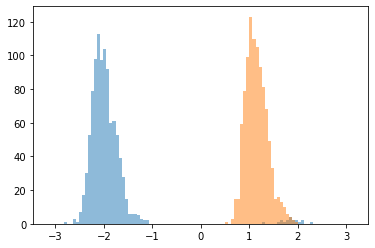

In [22]:
state_idx = 5
plt.hist(TYR2[state_idx], bins=100, range=(-np.pi, np.pi), alpha=0.5);
state_idx = 6
plt.hist(TYR2[state_idx], bins=100, range=(-np.pi, np.pi), alpha=0.5);



In [25]:
np.mean(TYR2[5]) - np.mean(TYR2[6]) 

-3.0739729634466424

(-3.141592653589793, 3.141592653589793)

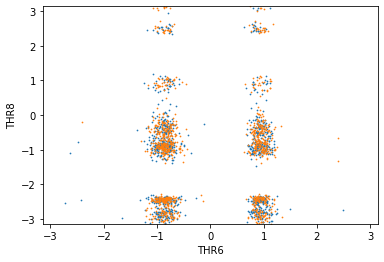

In [8]:
state_idx = 4

x = THR6[state_idx]
y = THR8[state_idx]
plt.scatter(x,y,s=0.5)

state_idx = 3

x = THR6[state_idx]
y = THR8[state_idx]
plt.scatter(x,y,s=0.5)


plt.xlabel('THR6')
plt.ylabel('THR8')
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)